# /content/drive/MyDrive/[스마트인재개발원 목포]딥러닝/data

# 단축키 사용법
- 실행 단축키
 - ctrl + Enter : 실행 후 커서가 그대로 있음
 - shift + Enter : 실행후 커서가 아래 셀로 이동
 - alt + Enter : 실행 후 아래 셀 추가

- 셀 아래 추가하기
 - ctrl + m + b
- 셀 위에 추가하기
 - ctrl + m + a

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 주석처리 '#'
# 코랩은 기본적으로 텐서플로우가 설치되어있음
# vscode, pycharm
# tensorflow 버전 확인
import tensorflow as tf
print(tf.__version__) # 언더바가 2개씩

2.15.0


In [3]:
# 현재 작업 디렉토리 확인
!pwd

/content


### 목표
- 공부시간에 따른 학생의 수학성적을 예측하는 회귀모델 만들기!!
 - 머신러닝 모델과 딥러닝 모델의 사용법의 차이점을 알아보기
 - Keras를 활용하여 신경망 구성방법을 알아보기

### 데이터 불러오기

In [4]:
# /content/drive/MyDrive/[스마트인재개발원 목포]딥러닝/data/student-mat.csv

In [5]:
# numpy, pandas, matplotlib
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# csv 파일 불러오기
# data 변수명에 데이터 담기
data_path = '/content/drive/MyDrive/[스마트인재개발원 목포]딥러닝/data/student-mat.csv'
data = pd.read_csv(data_path)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 문제와 정답데이터 분리
- 입력특징 1개:studytime
- 정답 1개 : G3

In [9]:
# 문제데이터(X): 2차원, 정답데이터(y)
# DataFrame에서 특정 컬럼의 데이터만 추출:인덱싱(슬라이싱)
X = data[['studytime']] # 문제
y = data['G3'] # 답지

In [10]:
X.shape,y.shape
# ((395,1),(395,))

((395, 1), (395,))

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studytime  395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [12]:
# loc, iloc
# data.loc[행,열]
# data.loc[:10,'studytime']
data.iloc[:,13]

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [13]:
# train,test set split (8:2)
from sklearn.model_selection import train_test_split
# train_test_split(문제,답지,분리비율(test_size), 랜덤규칙고정값설정)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state= 42
)


In [14]:
# 데이터 크기 확인 shape()
print('X_train 문제 ', X_train.shape)
print('X_test 문제', X_test.shape)
print('y_train 답지', y_train.shape)
print('y_test 답지', y_test.shape)

X_train 문제  (316, 1)
X_test 문제 (79, 1)
y_train 답지 (316,)
y_test 답지 (79,)


### 신경망 모델 만들기(모델링)
- 머신러닝과 딥러닝 모델링 차이점
 - 머신러닝 과정(회귀)
 - 모델 생성(완성된 객체를 사용)->모델학습->예측 및 평가
 - 완제품 로봇->팔정도는 움직일수 있음(하이퍼 파라미터 튜닝)
 - 딥러닝 과정
 - 모델 생성(모델 직접 구성)->모델학습->예측 및 평가
 - 조립식로봇/레고(우리가 만들고 싶은 모양으로 구성가능)
 - 다양한 모델링 결과를 만들어 낼 수 있음

### 머신러닝 모델링
- 회귀모델링(LR)
- 평가지표는
 - (MSE):평균제곱오차
 - (RMSE)

In [15]:
# 모델링(LR)
# 평가지표(MSE)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
#1 모델 생성
lr_model = LinearRegression()
# 2. 모델 학습
lr_model.fit(X_train,y_train)
# 3. 모델 예측
pre = lr_model.predict(X_test)
# 4. 모델 평가(MSE)
mse = mean_squared_error(y_test,pre)
# 5. 모델 평가(RMSE)
rmse = np.sqrt(mse)
# 출력
print('MSE', np.round(mse,2))
print('RMSE', np.round(rmse,2))

MSE 21.49
RMSE 4.64


### 딥러닝 모델 설계하기
- 1. 신경망 구조설계(다층/오늘은 단층)
- 2. 신경망 학습 방법 및 평가방법 설정
 - 평가방법:MSE
- 3. 모델 학습
- 4. 모델예측 및 평가

In [17]:
# tensorflow 도구 불러오기
from tensorflow.keras.models import Sequential # 뼈대 생성
from tensorflow.keras.layers import InputLayer, Dense, Activation
# 신경망 구성요소(조립)
# Sequential:뼈대(틀)
# InputLayer:입력층
# Dense : 중간층의 밀집도 설정
# Activation : 활성화 함수(값을 넘길지 말지 판단하는 함수)

In [18]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape=(1,)))
# 입력데이터의 형태를 결정 / 입력 특성의 개수를 입력

# 중간층(은닉층, 히든레이어)
model.add(Dense(units=10)) # 뉴련(선형모델) 10개 연결
model.add(Activation('sigmoid')) # 활성화 함수

# 출력층
model.add(Dense(units=1))
# 성적데이터 : 연속형(시퀀셜)

In [19]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 2. 학습방법 및 평가 방법 설정 compile
# 어떤 학습법과 평가방법을 사용할지 정해줘야 함
# loss : 모델의 잘못된 정도(오차)를 측정하는 알고리즘
# optimizer : 모델의 최적화 함수 adam,SGD
# metrics : 평가지표 accuracy(정확도)
model.compile(
    #loss='mse',
    loss='mean_squared_error',
    optimizer='SGD',
    metrics=['mse'] # 평균제곱오차
)

In [26]:
# 모델핛브
# (검증데이터)validataion_split -> X_train,y_train 데이터를 쪼개는 역할
# train데이터에서 약 20%를 검증데이터(validataion data)
# epochs : 모델의 최적화 횟수(업데이트 횟수)
history = model.fit(X_train,y_train, validation_split=0.2, epochs=30)

Epoch 1/30
8/8 [==============================] - 0s 12ms/step - loss: 21.3587 - mse: 21.3587 - val_loss: 18.3833 - val_mse: 18.3833
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 21.3972 - mse: 21.3972 - val_loss: 18.3875 - val_mse: 18.3875
Epoch 3/30
8/8 [==============================] - 0s 8ms/step - loss: 21.3951 - mse: 21.3951 - val_loss: 18.3940 - val_mse: 18.3940
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 21.4772 - mse: 21.4772 - val_loss: 18.3980 - val_mse: 18.3980
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 21.3458 - mse: 21.3458 - val_loss: 18.4081 - val_mse: 18.4081
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 21.4055 - mse: 21.4055 - val_loss: 18.4101 - val_mse: 18.4101
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 21.3323 - mse: 21.3323 - val_loss: 18.4145 - val_mse: 18.4145
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 21.34

In [23]:
X_test.shape

(79, 1)

In [27]:
# 모델 평가 evaluate ,   수능
# X_train,X_val,X_test
model.evaluate(X_test,y_test)
# 트레인:18.2775  테스트:21.5610

3/3 [==============================] - 0s 5ms/step - loss: 21.6192 - mse: 21.6192


[21.61919403076172, 21.61919403076172]

In [30]:
# 매 epochs마다 결과값이 들어가 있어요
new_var = history.history['mse']

In [31]:
new_var

[21.358692169189453,
 21.397188186645508,
 21.39506721496582,
 21.47721290588379,
 21.34579086303711,
 21.40550422668457,
 21.332286834716797,
 21.344341278076172,
 21.334228515625,
 21.41082000732422,
 21.372568130493164,
 21.422712326049805,
 21.375699996948242,
 21.359329223632812,
 21.297103881835938,
 21.42607307434082,
 21.331871032714844,
 21.34066390991211,
 21.374652862548828,
 21.322731018066406,
 21.353321075439453,
 21.326562881469727,
 21.313020706176758,
 21.31524085998535,
 21.362211227416992,
 21.331480026245117,
 21.338098526000977,
 21.378704071044922,
 21.40418815612793,
 21.321365356445312]

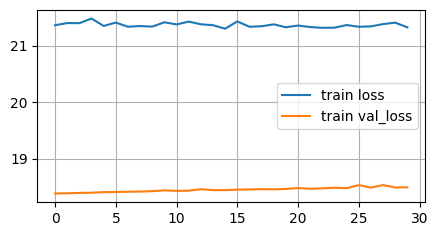

In [32]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2.5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='train val_loss')
plt.grid() # 격자무늬
plt.legend() # 범례

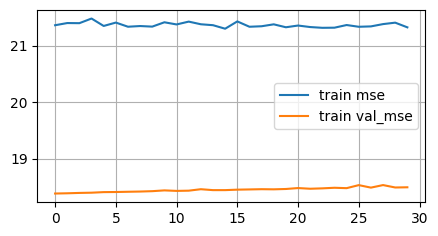

In [34]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2.5))
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='train val_mse')
plt.grid() # 격자무늬
plt.legend() # 범례

In [35]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 특징
- [studytime,traveltime , health ,freetime]


In [ ]:
# 모델 이름: model2
# history2 = model2.fit

In [37]:
X = data[['studytime','traveltime','health','freetime']] # 문제
y = data['G3'] # 답지

In [38]:
# train,test set split (8:2)
from sklearn.model_selection import train_test_split
# train_test_split(문제,답지,분리비율(test_size), 랜덤규칙고정값설정)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state= 42
)

In [39]:
print(X_train.shape,y_train.shape)

(316, 4) (316,)


In [40]:
# 1. 신경망 구조 설계
# 뼈대 생성
model2 = Sequential()
# 입력층
model2.add(InputLayer(input_shape=(4,)))
# 입력데이터의 형태를 결정 / 입력 특성의 개수를 입력

# 중간층(은닉층, 히든레이어)
model2.add(Dense(units=10)) # 뉴련(선형모델) 10개 연결
model2.add(Activation('sigmoid')) # 활성화 함수

# 출력층
model2.add(Dense(units=1))
# 성적데이터 : 연속형(시퀀셜)

In [41]:
model2.compile(
    #loss='mse',
    loss='mean_squared_error',
    optimizer='SGD',
    metrics=['mse'] # 평균제곱오차
)

In [42]:
# 모델핛브
# (검증데이터)validataion_split -> X_train,y_train 데이터를 쪼개는 역할
# train데이터에서 약 20%를 검증데이터(validataion data)
# epochs : 모델의 최적화 횟수(업데이트 횟수)
history2 = model2.fit(X_train,y_train, validation_split=0.2, epochs=30)

Epoch 1/30
8/8 [==============================] - 2s 82ms/step - loss: 66.7460 - mse: 66.7460 - val_loss: 27.2965 - val_mse: 27.2965
Epoch 2/30
8/8 [==============================] - 0s 27ms/step - loss: 25.8609 - mse: 25.8609 - val_loss: 18.1977 - val_mse: 18.1977
Epoch 3/30
8/8 [==============================] - 0s 26ms/step - loss: 22.5203 - mse: 22.5203 - val_loss: 17.5464 - val_mse: 17.5464
Epoch 4/30
8/8 [==============================] - 0s 24ms/step - loss: 22.4400 - mse: 22.4400 - val_loss: 17.4574 - val_mse: 17.4574
Epoch 5/30
8/8 [==============================] - 0s 25ms/step - loss: 22.3854 - mse: 22.3854 - val_loss: 17.4531 - val_mse: 17.4531
Epoch 6/30
8/8 [==============================] - 0s 20ms/step - loss: 22.3747 - mse: 22.3747 - val_loss: 17.4011 - val_mse: 17.4011
Epoch 7/30
8/8 [==============================] - 0s 21ms/step - loss: 22.3437 - mse: 22.3437 - val_loss: 17.4286 - val_mse: 17.4286
Epoch 8/30
8/8 [==============================] - 0s 24ms/step - loss

In [43]:
# 모델 평가 evaluate ,   수능
# X_train,X_val,X_test
model2.evaluate(X_test,y_test)
# [21.61919403076172, 21.61919403076172]

3/3 [==============================] - 0s 12ms/step - loss: 20.8711 - mse: 20.8711


[20.87105369567871, 20.87105369567871]

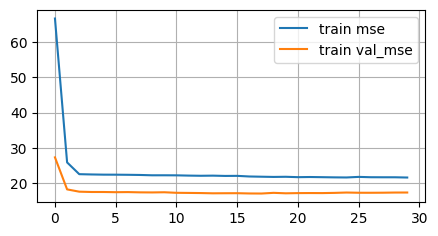

In [44]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2.5))
plt.plot(history2.history['mse'], label='train mse')
plt.plot(history2.history['val_mse'], label='train val_mse')
plt.grid() # 격자무늬
plt.legend() # 범례